# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [80]:
#ваш код 
import pandas as pd
df = pd.read_csv('data/Advertising.zip', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [81]:
#ваш код 
#посмотрим на общую информацию о данных
df.info()
#на первый взгляд пропусков нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [82]:
#ваш код 
#проверим ещё таким способом
df.isnull().mean()
#пропусков нет

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [83]:
#ваш код 
import numpy as np

#выделям предикторы и целевую переменную и преобразуем их в массивы
X = df[['TV','radio','newspaper']].values
y = df['sales'].values


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [84]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [85]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [86]:
# ваш код 

num_iters = 1000 #количество итераций
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros((n,1)) #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
        
w

#
#array([[ 41.56217205],
#      [110.13144155],
#      [ 73.52860638],
#      [ -0.55006384]])

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [87]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

#[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [88]:
#ваш код
#исходная матрица X
X = df[['TV','radio','newspaper']]

#т.к. по условию sklearn использовать нельзя (а значит и StandartScaler), то масштабируем следующим образом (по столбцам через цикл)
for i in list(X.columns):
    X[i] = X[i].apply(lambda x: (x-X[i].mean())/X[i].std())
    
#переводим в numpy массив
X = X.values

C:\Users\пользователь\AppData\Local\Temp\ipykernel_8464\443703859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].apply(lambda x: (x-X[i].mean())/X[i].std())


**Добавим единичный столбец**

In [89]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [90]:
#ваш код
def mse_error(real, pred):
    error = (real - pred)**2
    n = y.shape[0]
    cost = 1/(n)*np.sum(error)
    return cost

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [91]:
#ваш код
#делаем массив из средних значений, умножая массив из единиц на среднее значений
naive = np.ones(y.shape[0]) * y.mean()

#cчитаем
mse_error(y, naive)
#5417.14875

5417.14875

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [92]:
#ваш код
def lin_pred(matrixX, w):
    return matrixX @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [93]:
#ваш код

def stoch_grad_step(matrixX, y, w, train_ind, eta):
    change_diretion = (matrixX[train_ind] * 2 * (lin_pred(matrixX, w)[train_ind] - y[train_ind]))/(y.shape[0])
    return w - change_diretion * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [94]:
# ваш код
def stochastic_gradient_descent(matrixX, y, w_start_point, iterations, euclid_min, eta = 0.001):
    distance = np.inf #инициализация расстояния между соседними итерациями большим числом
    mse_costs = [] #пустой список для ошибок
    w=w_start_point #указываем начальные веса
    i = 0
    while distance > euclid_min and i < iterations:
            random_ind = np.random.randint(matrixX.shape[0]) # задаем случайный номер строки
            w_iter = stoch_grad_step(matrixX, y, w, random_ind, eta) #считаем новые вес
            distance = np.linalg.norm(np.array(w)-np.array(w_iter)) #cчитаем новое обновленное расстояние 
            w = w_iter #перезаписываем веса
            mse_costs.append(mse_error(y,lin_pred(matrixX, w))) #считаем ошибку и добавляем её в список
            i += 1
    return w, mse_costs      

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Text(0.5, 0, 'Номер итерации')

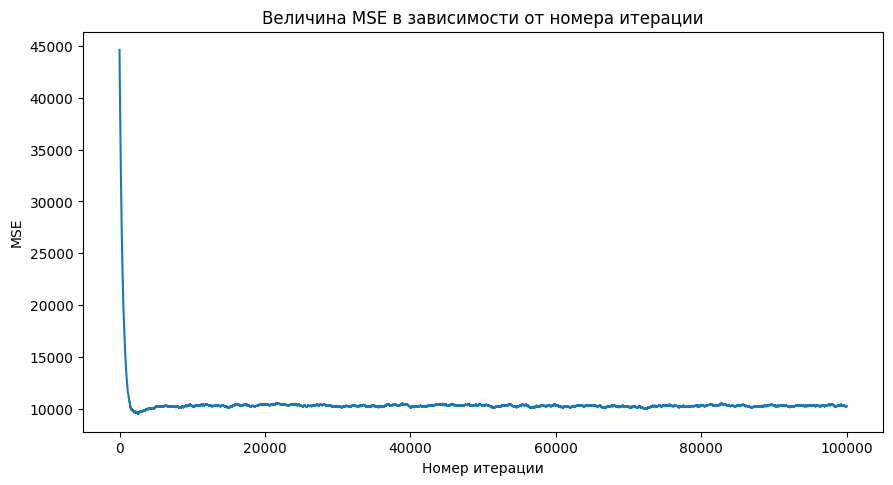

In [95]:
# ваш код
zeros = np.zeros(X.shape[1]) #вектор начальных весов (нулевой)

result = stochastic_gradient_descent(matrixX=X,y=y,w_start_point=zeros,iterations=10**5,euclid_min=0.0000001,eta = 0.1) #итерации

import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(
    range(len(result[1])), 
    result[1]

);

axes.set_title("Величина MSE в зависимости от номера итерации")
axes.set_ylabel('MSE')
axes.set_xlabel('Номер итерации')

Text(0.5, 0, 'eta')

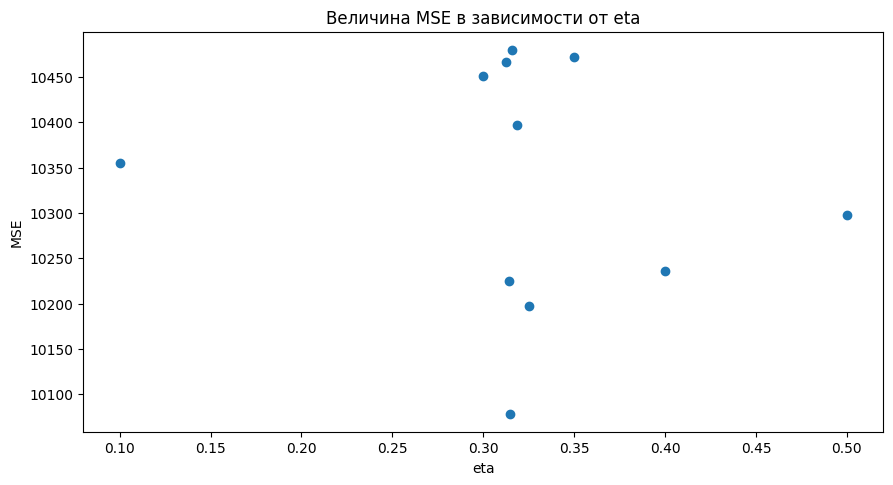

In [106]:
#поэкспериментируем с темпом eta
#напишем функцию, которая попробует подобрать eta путем итераций
def eta_experiment(max_eta, min_eta, max_iterations):
    mse_dict= {}
    i=0
    while i < max_iterations:
        max_eta_result = stochastic_gradient_descent(matrixX=X,y=y,w_start_point=zeros,iterations=10**5,euclid_min=0.0000001,eta = max_eta) #считаем лучший результат при max_eta
        min_eta_result = stochastic_gradient_descent(matrixX=X,y=y,w_start_point=zeros,iterations=10**5,euclid_min=0.0000001,eta = min_eta) #считаем лучший результат при min_eta
        mse_dict[max_eta]=max_eta_result[1][-1] # записываем в словарь
        mse_dict[min_eta]=min_eta_result[1][-1] # записываем в словарь
        if min_eta_result[1][-1] < max_eta_result[1][-1]:  #обновляем max и min eta
            max_eta = max_eta - 0.5 * (max_eta - min_eta)
        else:
            min_eta = min_eta + 0.5 * (max_eta - min_eta)
        i +=1
    return mse_dict


eta_result = eta_experiment(0.5, 0.1, 10)

#нарисуем график
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    eta_result.keys(), 
    eta_result.values()

);

axes.set_title("Величина MSE в зависимости от eta")
axes.set_ylabel('MSE')
axes.set_xlabel('eta')

In [111]:
# выведем лучшее значение eta
key_list = list(eta_result.keys())
val_list = list(eta_result.values())
 
position = val_list.index(min(val_list))
print(f'eta = {key_list[position]}, mse = {eta_result[key_list[position]]}')
#eta = 0.31484375000000003, mse = 10078.716986691565

eta = 0.31484375000000003, mse = 10078.716986691565


Text(0.5, 0, 'Номер итерации')

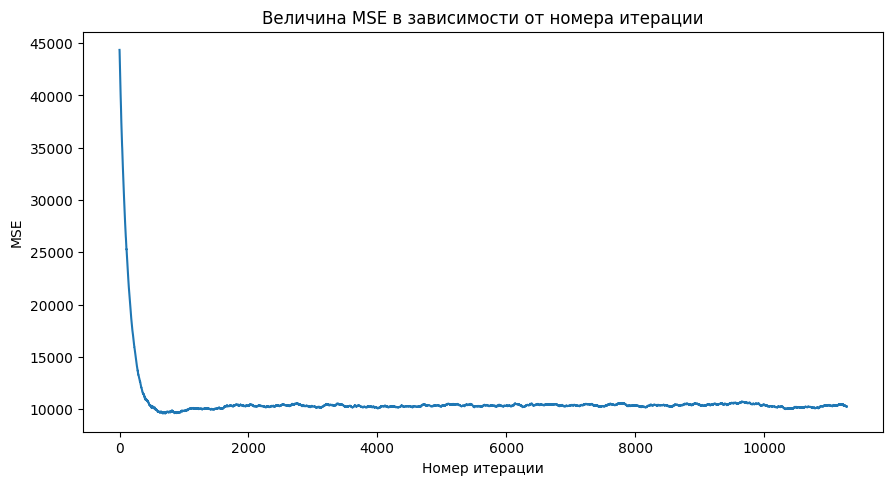

In [112]:
#оптимальный вариант с eta - 0.31484375000000003
# пробуем ещё раз посчитать по нему

result = stochastic_gradient_descent(matrixX=X,y=y,w_start_point=zeros,iterations=10**5,euclid_min=0.0000001,eta = key_list[position]) #итерации

import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(
    range(len(result[1])), 
    result[1]

);

axes.set_title("Величина MSE в зависимости от номера итерации")
axes.set_ylabel('MSE')
axes.set_xlabel('Номер итерации')

**Выведите вектор весов, к которому сошелся метод.**

In [113]:
# ваш код
result[0]
#array([14.0030144 ,  3.89963141,  2.79971029,  0.03957974])

array([14.0030144 ,  3.89963141,  2.79971029,  0.03957974])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [116]:
# ваш код
result[1][-1]
#10260.848508391136

#цифры могут немного отличаться, т.к. stochastic_gradient_descent стоит случайный подбор строки

10260.848508391136